# Frequentist Model Fitting Breakout

In this session, we're going to fit some **Generalized Linear Models** to astronomical data.

As usual, we'll start with the standard imports and IPython notebook setup:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#!pip install astroPy astroML

# use seaborn plotting defaults
# If this causes an error, you can comment it out.
import seaborn as sns
sns.set()

## Part I: Fourier Fit to RR Lyrae

We'll start by doing a multi-term Fourier fit to an RR Lyrae star.
Note that downloading the data will require installation of [astroML](http://astroml.org), which can be done easily by running

```
$ pip install astroML
```

at the command-line.

In [2]:
from fig_code import sample_light_curve
t, y, dy = sample_light_curve()

Visualize the data:

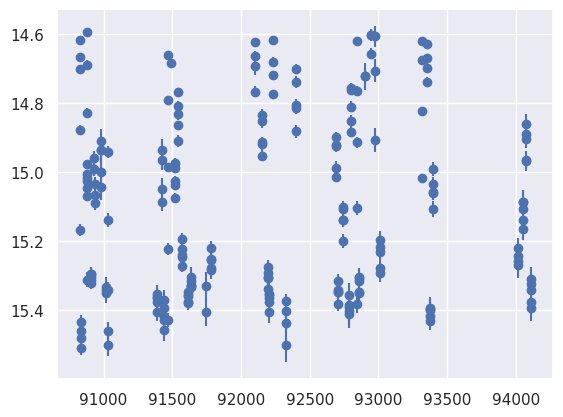

In [3]:
plt.errorbar(t, y, dy, fmt='o')
plt.gca().invert_yaxis();

This data has already been phased, so if we just take the fractional part of *t* then we can see the folded light curve

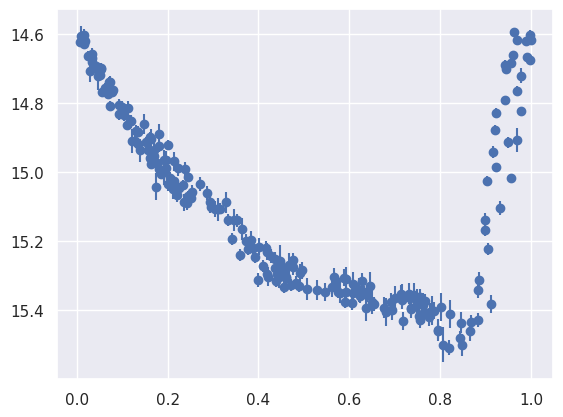

In [4]:
plt.errorbar(t % 1, y, dy, fmt='o')
plt.gca().invert_yaxis();

Here is your task: **Fit a Fourier model to this data** of the form

$$
y = a_0 + a_1 \sin(\omega t) + b_1 \cos(\omega t) + a_2 \sin(2 \omega t) + b_2 \cos(2\omega t)
$$

and note that we can go to as high an order as we like.
First we'll do this using ``scipy.optimize.fmin`` (i.e. an iterative solution), and then we'll do it using the closed-form linear algebra solution.

You should strive to make these functions as general as possible, i.e.

### 1. Iterative Solution

We'll start with an iterative solution to the problem.

1. Create a function which evaluates the model given an array of times *t*, a base frequency $\omega$, and an array of coefficients $\theta$.  **For this section, we will not treat $\omega$ as a model parameter, but as a constant.** For your model, you can use $\omega = 2\pi$ (we'll relax this assumption in part II).

2. Create a function which evaluates the log-likelihood as a function of $\theta$, using the above function.  **Keep in mind that ``theta`` must be a one-dimensional array (this is what ``optimize.fmin()`` requires)**

3. Use ``scipy.optimize.fmin`` to maximize your log-likelihood (i.e. minimize the negative log-likelihood) to find the optimal model.

4. Plot this model over the data to see how it looks.

5. Use new data, from ``fig_code.sample_light_curve_2()``, and apply your code again (hopefully you've written the functions so that they can easily be reused, right?

### 2. Direct Solution

Now that you've done this iteratively, let's compute the direct solution using linear algebra.

1. Create a function which will construct the design matrix ($X$) given *t*, $\omega$, and a specified number of terms

2. Create a function which, given this design matrix, will compute the maximum likelihood parameters using ``np.linalg.dot`` and ``np.linalg.solve``.

3. Plot this answer over your previous answer. Hint: they should agree!

## Part II: Bonus – finding the optimal phase

It's possible (though much more difficult) to use maximum-likelihood estimation to find the best phase. Loading the data this way gives the raw MJD values of the observations.

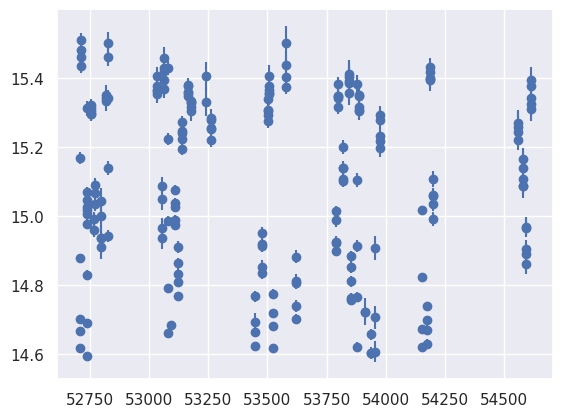

In [5]:
t, y, dy = sample_light_curve(phased=False)
plt.errorbar(t, y, dy, fmt='o');

The model we want to fit is:

$$
y = a_0 + a_1\sin(\omega t) + b_1\cos(\omega t)
$$

except this time our parameter vector is $\theta = [a_0, a_1, a_2, \omega]$. Since we're fitting for $\omega$ itself, this is **not a linear model**, so the closed-form solution will not work. Furthermore, this is a **non-convex** problem, so standard optimization will not work either!

Instead, we'll do a bit of a hack: for each value of $\omega$, we find the best $(a_0, a_1, b_1)$, and then report the value of the log-likelihood as a function of $\omega$.

Your task is to plot $\omega$ vs. $\log L_{max}(\omega)$ and find the $\omega$ which best-fits the data. Once you've done this, divide *t* by the phase, and re-produce the plots you did above.

We'll see later in the week that there is a more efficient way of doing this procedure, called the *Lomb-Scargle Periodogram*. At its core, however, it's essentially doing exactly what we do here, just much more efficiently.